In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
dataset = dataset.drop(columns=['Id'])

In [5]:
dataset.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
for empty in dataset.columns:
    print('{} Species with {} missing value'.format(empty, dataset[empty].isnull().sum()))

SepalLengthCm Species with 0 missing value
SepalWidthCm Species with 0 missing value
PetalLengthCm Species with 0 missing value
PetalWidthCm Species with 0 missing value
Species Species with 0 missing value


In [7]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [8]:
#divide the dataset into independent and dependent category
x = dataset[features]
y = dataset.Species

In [9]:
#convert the y variable into 
encodel = LabelEncoder()
y = encodel.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
#individual column 
SL = x.iloc[:, 0]
SW = x.iloc[:, 1]
PL = x.iloc[:, 2]
PW = x.iloc[:, 3]

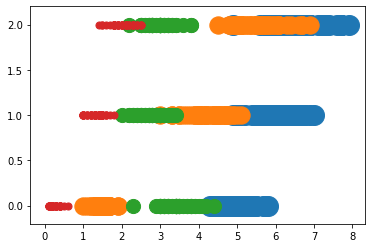

In [11]:
plt.scatter(SL, y, s= 400, label= 'SapelLength')
plt.scatter(PL, y, s= 300, label= 'SapelLength')
plt.scatter(SW, y, s= 200, label= 'SapelLength')
plt.scatter(PW, y, s= 50,  label= 'SapelLength')

Text(0.5, 1.0, 'Sepalwidth vs SepalLenght')

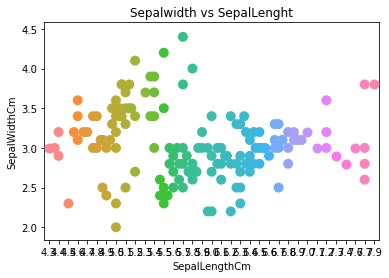

In [12]:
sbn.swarmplot(SL, SW, data= x, size= 10)
plt.title('Sepalwidth vs SepalLenght')

Text(0.5, 1.0, 'Petalwidth vs PetalLenght')

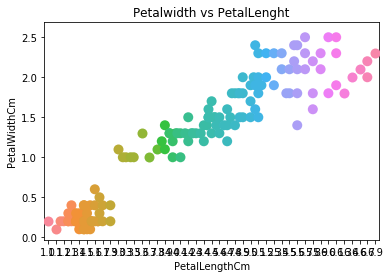

In [13]:
sbn.swarmplot(PL, PW, data= x, size= 10)
plt.title('Petalwidth vs PetalLenght')

In [14]:
#divide the x and y dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [15]:
#create an object of the Logisticregressor and fit the training sets
classifier = LogisticRegression(random_state= 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#texting the model
Logis_pred = classifier.predict(x_test)


In [18]:
confmetrix = confusion_matrix(y_test, Logis_pred)
confmetrix

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [18]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x = np.array(x)
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
x_minn, x_maxx = x[:, 2].min() - .5, x[:, 2].max() + .5
y_minn, y_maxx = x[:, 3].min() - .5, x[:, 3].max() + .5
h = .02  # step size in the mesh
xx = np.meshgrid(np.arange(x_min, x_max, h))#, np.arange(y_min, y_max, h), np.arange(x_minn, x_maxx, h), np.arange(y_minn, y_maxx, h))
yy = np.meshgrid(np.arange(y_min, y_max, h))
xxx = np.meshgrid(np.arange(x_minn, x_maxx, h))
yyy = np.meshgrid(np.arange(y_minn, y_maxx, h))
xx = np.array(xx)
xxx = np.array(xxx)
yy = np.array(yy)
yyy = np.array(yyy)
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), xxx.ravel(), yyy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 231 and the array at index 1 has size 171

In [ ]:
xx = np.array(xx)

In [ ]:
xx.ravel()

In [ ]:
#f, ax = plt.subplots(figsize=(10,6))
#sbn.heatmap(confmetrix, annot= True, linewidths= 1.9)
#f.subplots_adjust(top= 0.5)

In [ ]:
#mean_absolute_error(y_test, y_pred)
#mean_squared_error(y_test, y_pred)
#r2_score(y_test, Logis_pred)

                                        Implementing The Second Classification Algorithm 

In [ ]:
#using kernel suport vector machine classifier 
classifier = SVC(kernel= 'rbf', random_state= 0)
classifier.fit(x_train, y_train)

In [ ]:
KSVC_preg = classifier.predict(x_test)

In [ ]:
KSVC_metrix = confusion_matrix(y_test, KSVC_preg)

In [ ]:
KSVC_metrix

In [ ]:
#confmetrix

In [ ]:
mmm = mean_squared_error(y_test, KSVC_preg)

In [ ]:
mmm

In [ ]:
x[: 0]